## Problem Set 1: Gaussians and Visualization
### Made by Denis Fatykhoph

### Task 1: Probability
**A.** Plot the probability density function $ p(x) $ of a one dimensional Gaussian distribution $ \mathcal{N} (x; 1, 1) $ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

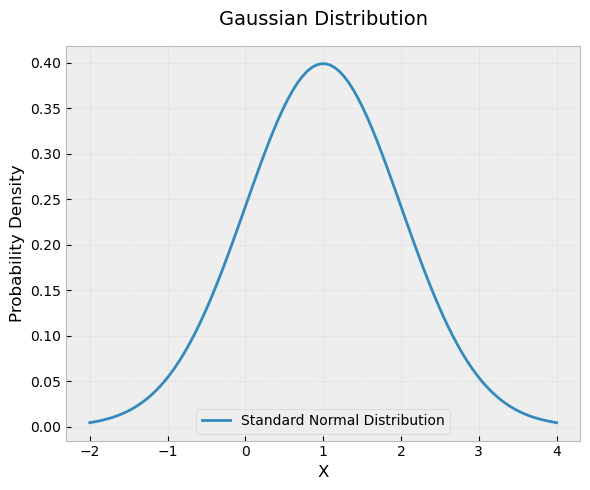

In [2]:
plt.style.use('bmh')  # or 'ggplot', 'bmh', 'classic'

x = np.linspace(-2, 4, 100)
dist_pdf = stats.norm.pdf(x , 1, 1)

plt.figure(figsize=(6, 5))
plt.plot(x, dist_pdf, linewidth=2, label='Standard Normal Distribution')

plt.title('Gaussian Distribution', fontsize=14, pad=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

**B.** Calculate the probability mass that the random variable $ X $ is less than $ 0 $, that is, $Pr \left\{ X \le 0 \right\} = \int_{-\infty}^{0} p(x) dx$

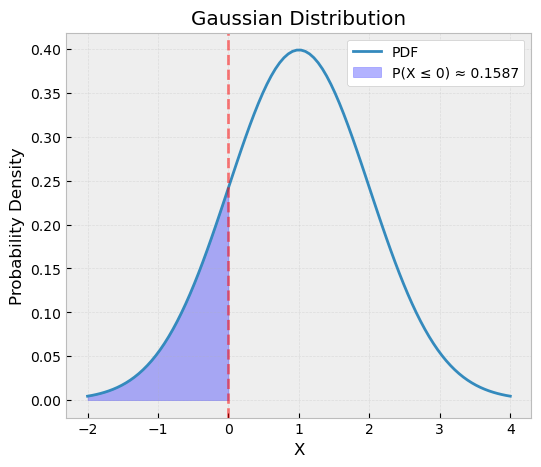

In [3]:
probability = stats.norm.cdf(0, loc=1, scale=1)

plt.figure(figsize=(6, 5))
plt.plot(x, dist_pdf, label='PDF')

# Shade the area for X ≤ 0
mask = x <= 0
plt.fill_between(x[mask], dist_pdf[mask], color='blue', alpha=0.3, 
                 label=f'P(X ≤ 0) ≈ {probability:.4f}')

# Vertical line at x=0
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)

plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.legend(facecolor='white', framealpha=1)
plt.show()

**C.** Consider the new observation variable $ z $, it gives information about the variable $ x $ by the likelihood function $ p(z|x) = \mathcal{N} \left( z; x, \sigma^2 \right) $, with variance $ \sigma^2 = 0.2 $. Apply the Bayes’ theorem to derive the posterior distribution, $ p(x|z) $, given an observation $ z = 0.75 $ and plot it. For a better comparison, plot the prior distribution, $ p(x) $, too.

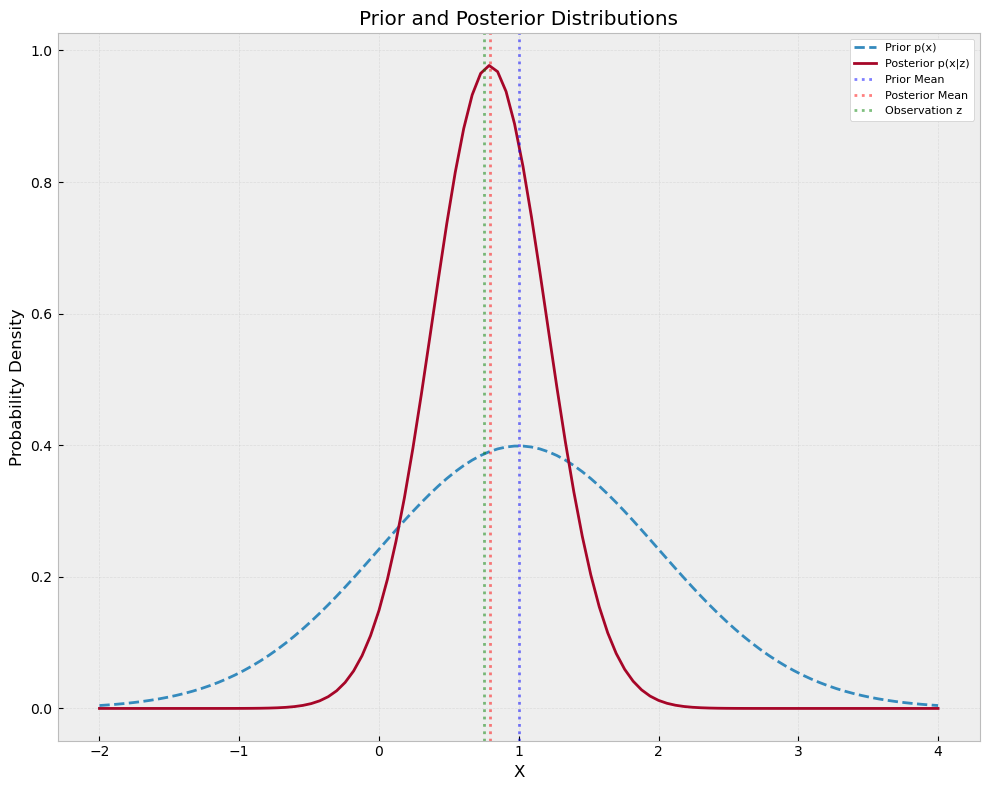

In [4]:
# Parameters
z = 0.75
sigma_z = 0.2
prior_mean = 1
prior_var = 1

# Bayes theorem
posterior_var = 1 / (1/prior_var + 1/sigma_z)
posterior_mean = posterior_var * (prior_mean/prior_var + z/sigma_z)

# Calculate PDFs
prior_pdf = stats.norm.pdf(x, prior_mean, np.sqrt(prior_var))
posterior_pdf = stats.norm.pdf(x, posterior_mean, np.sqrt(posterior_var))

plt.figure(figsize=(10, 8))
plt.plot(x, prior_pdf, label='Prior p(x)', linestyle='--')
plt.plot(x, posterior_pdf, label='Posterior p(x|z)')

plt.axvline(x=prior_mean, color='blue', linestyle=':', alpha=0.5, label='Prior Mean')
plt.axvline(x=posterior_mean, color='red', linestyle=':', alpha=0.5, label='Posterior Mean')
plt.axvline(x=z, color='green', linestyle=':', alpha=0.5, label='Observation z')

plt.title('Prior and Posterior Distributions')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.legend(facecolor='white', framealpha=1, fontsize=8)
plt.tight_layout()
plt.show()


### Task 2. Multivariate Gaussian 
**A.** Write the function `plot2dcov` which plots the 2d contour given three core parameters: mean, covariance, and the iso-contour value k. You may add any other parameter such as color, number of points, etc.

Then, use `plot2dcov` to draw the iso-contours corresponding to $ 1,2,3- \sigma $ of the following Gaussian distributions: $\mathcal{N} \left( \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix} \right) $, $\mathcal{N} \left( \begin{bmatrix} 5 \\ 0 \end{bmatrix}, \begin{bmatrix} 3 & -0.4 \\ -0.4 & 2 \end{bmatrix} \right)$ and $\mathcal{N} \left( \begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 9.1 & 6 \\ 6 & 4 \end{bmatrix} \right)$. Use `the set_aspect(’equal’)` command and comment on them.

In [5]:
def plot2dcov(mean, cov, k, n_points=100, color='blue', alpha=0.5, label=None):
    """
    Plot 2D Gaussian contours
    
    Parameters:
    mean: 2D mean vector
    cov: 2x2 covariance matrix 
    k: sigma multiplier for iso-contour
    color: contour color
    n_points: number of points for contour
    alpha: transparency
    label: legend label
    """
    theta = np.linspace(0, 2*np.pi, n_points)
    circle = np.vstack([np.cos(theta), np.sin(theta)])
    
    A = np.linalg.cholesky(cov)
    
    scaled = k * circle
    transformed = A @ scaled + mean[:, np.newaxis]
    
    return plt.plot(transformed[0,:], transformed[1,:], color=color, alpha=alpha, label=label)


In [6]:
mean = np.array([
    [0, 5, 2],
    [0, 0, 2]
])

cov = np.array([
    [1, 0, 3, -0.4, 9.1, 6],
    [0, 2, -0.4, 2, 6, 4]
])

for i in range(len(mean.T)):
    print(f'mean\n {mean[:,i]}')
    print(f'cov\n {cov[:,2*i:2*(i+1)]}')

mean
 [0 0]
cov
 [[1. 0.]
 [0. 2.]]
mean
 [5 0]
cov
 [[ 3.  -0.4]
 [-0.4  2. ]]
mean
 [2 2]
cov
 [[9.1 6. ]
 [6.  4. ]]


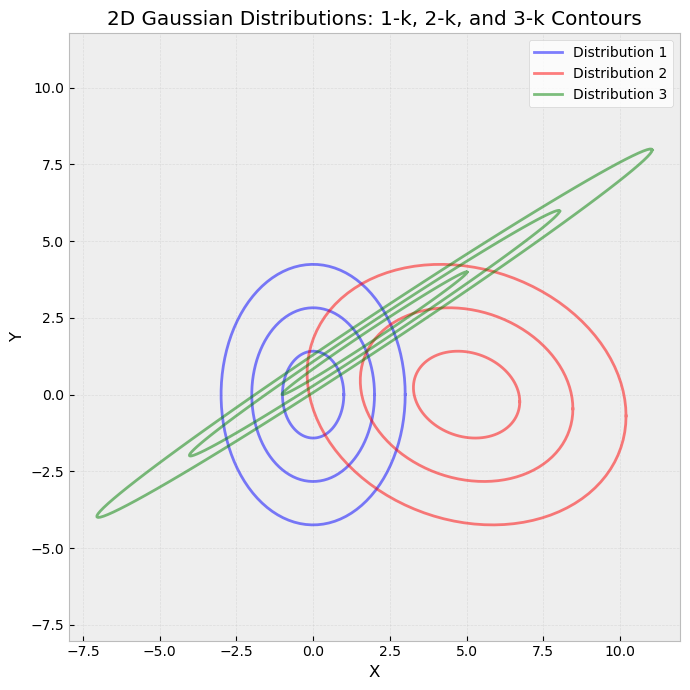

In [7]:
# Create figure
plt.figure(figsize=(7,7))

# Plot contours for each distribution
sigmas = [1, 2, 3]
distributions = [
    (mean[:,0], cov[:,0:2], 'Distribution 1'),
    (mean[:,1], cov[:,2:4], 'Distribution 2'),
    (mean[:,2], cov[:,4:6], 'Distribution 3')
]
colors = ['blue', 'red', 'green']

for (mu, sigma, name), color in zip(distributions, colors):
    for k in sigmas:
        plot2dcov(mu, sigma, k, color=color, alpha=0.5, 
                 label=f'{name}' if k==1 else None)

plt.grid(True, alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distributions: 1-k, 2-k, and 3-k Contours')
plt.legend(facecolor='white', loc='upper right')
plt.axis('equal')  # set_aspect('equal')
plt.tight_layout()
plt.show()


**B.**  Write the equation of sample mean and sample covariance of a set of points $ \left\{ x_i \right\} $, in vector form as was shown during the lecture. You can provide your solution by using Markdown, latex, by hand, etc.

From first lecture, the sample mean is expectation of the set:

$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

The sample covariance matrix is defined as:

$$
\bar{\Sigma} = \frac{1}{N - 1} \sum_{i=1}^{N} (x_i - \bar{x})(x_i - \bar{x})^T
$$

**C.** Draw random samples from a multivariate normal distribution. You can use the python function that draws samples from the univariate normal distribution $ \mathcal{N}(0,1) $. In particular, draw and plot 200 samples from $ \mathcal{N} \left( \begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 1 & 1.3 \\ 1.3 & 3 \end{bmatrix} \right) $; also plot their corresponding 1-sigma iso-contour. Then calculate the sample mean and covariance in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try a different number of samples (e.g. 50, 400). Comment briefly on the results

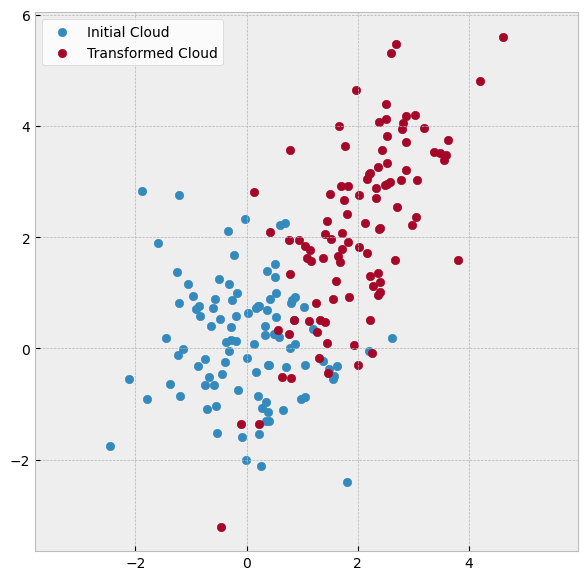

In [8]:
n_samples = 100
original_cloud = np.random.randn(n_samples, 2)

mean = np.array([
    [2],
    [2]
])

cov = np.array([
    [1, 1.3],
    [1.3, 3]
])

A = np.linalg.cholesky(cov)
cloud = (A @ original_cloud.T + mean).T

plt.figure(figsize=(7,7))
plt.scatter(original_cloud[:,0], original_cloud[:,1],label='Initial Cloud')
plt.scatter(cloud[:,0], cloud[:,1],label='Transformed Cloud')
plt.axis('equal')
plt.legend(facecolor='white')
plt.show()

/var/folders/7k/4vb9j3_s13l8qv3m4vdw9m5w0000gn/T/ipykernel_31361/1704225953.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(ellipse[0,:], ellipse[1,:], 'r-', color='blue', label='1-k Contour')


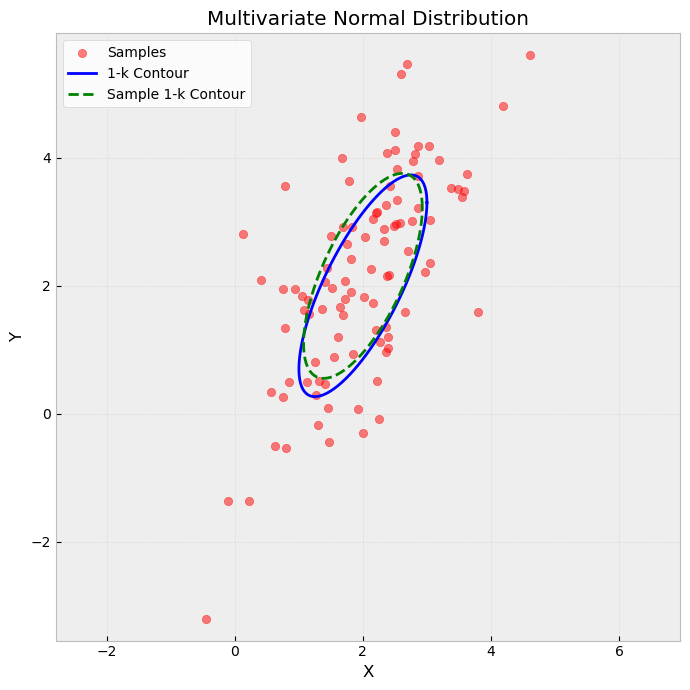

In [9]:
plt.figure(figsize=(7,7))
plt.scatter(cloud[:,0], cloud[:,1], alpha=0.5, color='red', label='Samples')

theta = np.linspace(0, 2*np.pi, 100)
circle = np.vstack([np.cos(theta), np.sin(theta)])

A = np.linalg.cholesky(cov)
ellipse = A @ circle + mean
plt.plot(ellipse[0,:], ellipse[1,:], 'r-', color='blue', label='1-k Contour')

sample_mean = np.mean(cloud, axis=0).reshape(-1,1)
sample_cov = np.cov(cloud.T)
A_sample = np.linalg.cholesky(sample_cov)

sample_ellipse = A_sample @ circle + sample_mean
plt.plot(sample_ellipse[0,:], sample_ellipse[1,:], 'g--', label='Sample 1-k Contour')

plt.grid(True, alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Multivariate Normal Distribution')
plt.legend(facecolor='white', loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.show()